---
# H515 - Statistical Learning - Course Project
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("./data/Melbourne_housing_FULL.csv")

## Original Data

In [2]:
df_original.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df_original.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## Preprocessing

### NA Values

In [5]:
df_original.shape

(34857, 21)

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df_original.drop(columns=["BuildingArea", "YearBuilt"], axis=1, inplace=True)
df = df_original.dropna()

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
df.shape

(17679, 19)

### Column Types

In [9]:
columns = ["Bedroom2", "Bathroom", "Car"]

for column in columns:
    df[column] = df[column].astype(int)

/tmp/ipykernel_29627/1316568818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_29627/1316568818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_29627/1316568818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

### Duplicates

In [10]:
duplicated = df.duplicated(subset=("Lattitude", "Longtitude", "Date"), keep="first")

df[duplicated].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3533,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,2,1,1,2886.0,Yarra City Council,-37.8042,144.9845,Northern Metropolitan,4553.0
3540,Collingwood,6/78 Oxford St,2,u,910000.0,S,Jellis,4/03/2017,1.6,3066.0,2,1,1,0.0,Yarra City Council,-37.8035,144.9850,Northern Metropolitan,4553.0
5358,Hawthorn,318/6 Lisson Gr,1,u,485000.0,S,Marshall,28/08/2016,4.6,3122.0,2,1,1,0.0,Boroondara City Council,-37.8264,145.0270,Southern Metropolitan,11308.0
7829,Port Melbourne,133/95 Rouse St,2,u,1070000.0,S,RT,10/09/2016,3.8,3207.0,2,2,1,0.0,Melbourne City Council,-37.8435,144.9415,Southern Metropolitan,8648.0
8045,Prahran,49 Clifton St,2,h,765000.0,S,Beller,19/11/2016,4.5,3181.0,2,1,0,98.0,Stonnington City Council,-37.8501,144.9953,Southern Metropolitan,7717.0


In [11]:
df = df[~duplicated]

### Removing Outliers

#### YearBuilt

In [12]:
def plot_histogram(dataframe, column, figsize=None):

    if figsize is not None:
        plt.figure(figsize=figsize)
    sns.histplot(dataframe[column])
    plt.title(f"Histogram of {column} Column")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [13]:
# plot_histogram(df, "YearBuilt", (10, 8))

In [14]:
# built_before_1800 = df["YearBuilt"] < 1800
# df[built_before_1800]

In [15]:
# df = df[~built_before_1800]

#### BuildingArea

In [16]:
# build_eq_zero = (df["BuildingArea"] == 0)
# print(f"Properties with Zero Building Area - {sum(build_eq_zero)}")

# df = df[~build_eq_zero]

#### Landsize

In [17]:
# land_eq_zero = (df["Landsize"] == 0)
# print(f"Properties with Zero Land Size - {sum(land_eq_zero)}")

# df = df[~land_eq_zero]

In [18]:
# plot_histogram(df, "Landsize", (10, 8))

In [19]:
# percentile_value = df["Landsize"].quantile(.95)
# print(percentile_value)

# gt_95_prec_land = (df["Landsize"] > percentile_value)
# df[gt_95_prec_land].head()

In [20]:
# percentile_value = df["Landsize"].quantile(.995)
# print(percentile_value)

# gt_995_prec_land = (df["Landsize"] > percentile_value)
# df[gt_995_prec_land].head()

In [21]:
# df[df["Landsize"] > 30000]

In [22]:
# land_size_up_threshold = 10000
# gt_10000_land = (df["Landsize"] > land_size_up_threshold)

# df = df[~gt_10000_land]

In [23]:
# (df["Landsize"] < 55).sum()

In [24]:
# land_size_lo_threshold = 55
# lt_55_land = (df["Landsize"] < land_size_lo_threshold)

# df = df[~lt_55_land]

### Column Selection

In [25]:
print("Columns Unique Value Counts - \n")
for column in df.columns:
    print(f"{column} -", df.loc[:, column].nunique())

Columns Unique Value Counts - 

Suburb - 333
Address - 17354
Rooms - 10
Type - 3
Price - 2446
Method - 5
SellerG - 308
Date - 78
Distance - 207
Postcode - 204
Bedroom2 - 13
Bathroom - 10
Car - 13
Landsize - 1542
CouncilArea - 33
Lattitude - 9375
Longtitude - 10083
Regionname - 8
Propertycount - 328


Columns **not** being used - `Suburb`, `Address`, `Method`, `SellerG`, `Postcode`, `CouncilArea` and `Regionname`

### Feature Engineering

#### BuildtoLandArea

In [26]:
# df["BuildtoLandArea"] = df["Landsize"] / df["BuildingArea"]

#### Property Count

In [27]:
percentiles = [0, 20, 40, 60, 80, 100]
bin_edges = np.percentile(df['Propertycount'], percentiles)

bin_labels = ["Highly Sparse", "Below Avg.", "Average", "Above Avg.", "Highly Dense"]
df["Propertycount_Bins"] = pd.cut(df["Propertycount"], bins=bin_edges, labels=bin_labels, include_lowest=True)

#### Bedroom

In [28]:
bed_20 = (df["Bedroom2"] == 20)

df = df[~bed_20]

#### Bathroom

In [29]:
bath_zero = (df["Bathroom"] == 0)

df = df[~bath_zero]

#### BedtoBath

In [31]:
df["BedtoBath"] = df["Bedroom2"] / df["Bathroom"]

In [32]:
num_columns = ["Distance", "Landsize", "Lattitude", "Longtitude", "BedtoBath"]
cat_columns = ["Rooms", "Type", "Bedroom2", "Bathroom", "Car", "Propertycount_Bins"]

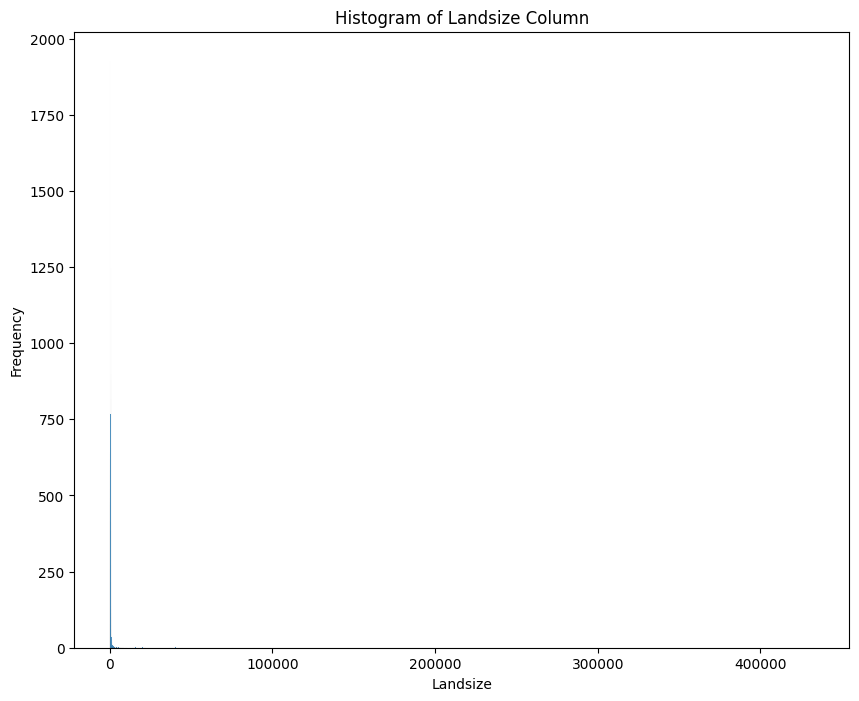

In [33]:
plot_histogram(df, "Landsize", (10, 8))

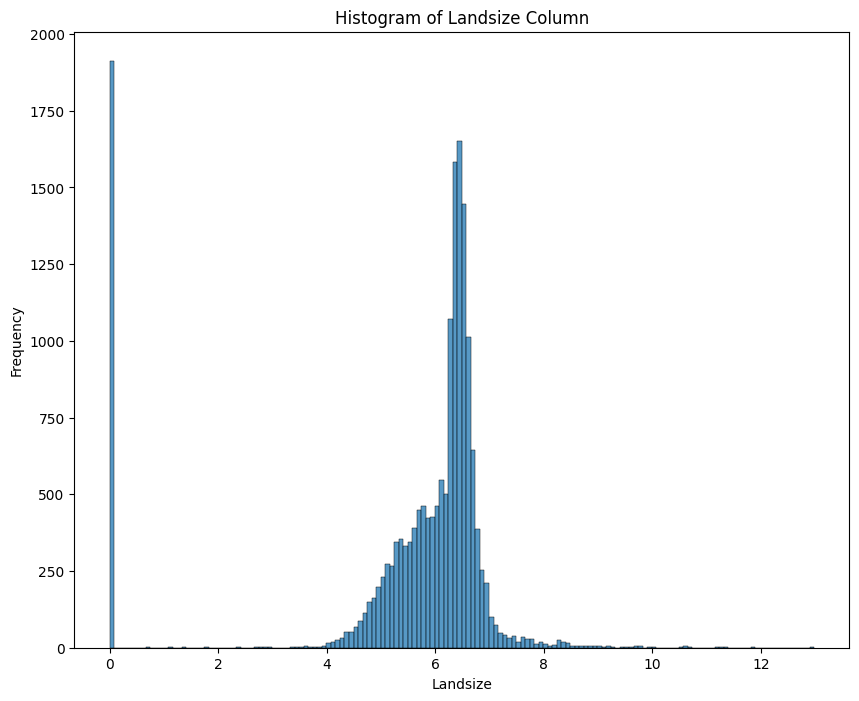

In [34]:
tail_heavy_columns = ["Landsize", ]
df[tail_heavy_columns] = df[tail_heavy_columns].apply(lambda x: np.log(x+1))

plot_histogram(df, "Landsize", (10, 8))

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", StandardScaler(), num_columns),
        ("categorical", OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ]
)

In [37]:
df_preprocessed = preprocessor.fit_transform(df)

df_preprocessed = df_preprocessed.toarray()
print(df_preprocessed.shape)

np.save("processed-data/v2/X.npy", df_preprocessed)

(17627, 57)


In [38]:
np.save("processed-data/v2/y.npy", df["Price"])

In [39]:
# pd.DataFrame(df_preprocessed)
# pd.DataFrame(df_preprocessed).to_csv("preprocessed_data.csv", index=False)

In [41]:
import joblib

joblib.dump(preprocessor, "joblib-files/preprocessing/v2/preprocessor.pkl")

['joblib-files/preprocessing/v2/preprocessor.pkl']